# Assignment #1: low level DIP practice

## Apply the Types of filter as follows:
- Gaussian blur
- Median filter
- Dilation and erosion
- Customs filters
- Image thresholding

First step, I import all modules in the beginning.

In [1]:
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter, ImageEnhance
from skimage import io, data, filters, color, segmentation
from skimage.morphology import disk, dilation, erosion
from skimage.util import random_noise, img_as_ubyte
import numpy as np

I prepare some variables

In [2]:
img_ski = data.astronaut()
img_pil = Image.fromarray(img_ski)
img_title = "Astronaut"

## 1. Gaussian Blur

<ipython-input-3-af89ef41a5c6>:10: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  ski_gau = filters.gaussian(img_ski, sigma=4)


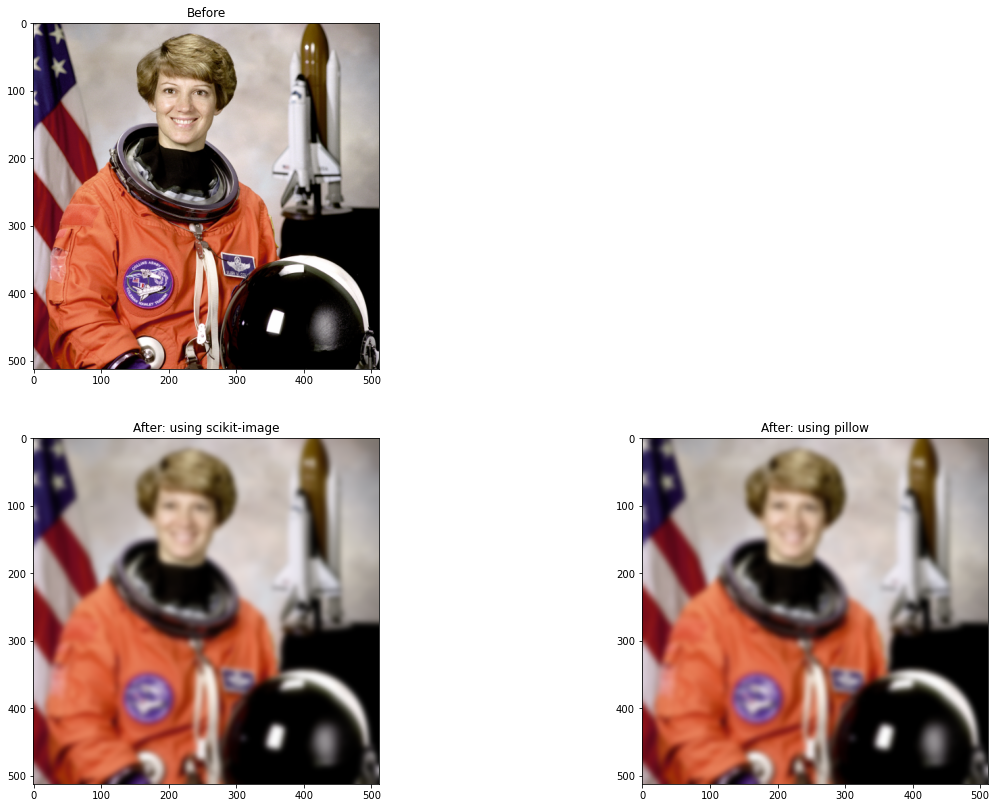

In [3]:
fig2 = plt.figure(figsize=(20, 14))

# before: The two variables above have the same image, so I just use one variable
bfr_gau1 = img_ski
fig2.add_subplot(2, 2, 1)
plt.title("Before")
plt.imshow(bfr_gau1)

# using scikit-image
ski_gau = filters.gaussian(img_ski, sigma=4)
fig2.add_subplot(2, 2, 3)
plt.title("After: using scikit-image")
plt.imshow(ski_gau)

# using pillow
pil_gau = img_pil.filter(ImageFilter.GaussianBlur(4))
fig2.add_subplot(2, 2, 4)
plt.title("After: using pillow")
plt.imshow(pil_gau)

## 2. Median Filter

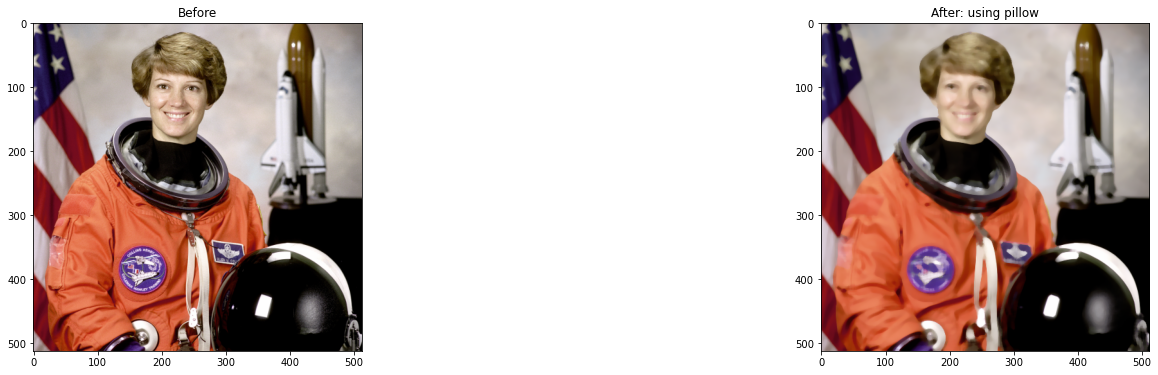

In [4]:
fig3 = plt.figure(figsize=(20,7))

fig3.add_subplot(1, 3, 1)
plt.title("Before")
plt.imshow(img_ski)

# img_ski = np.array(img_ski, dtype = 'uint8')
# ski_medfil = filters.rank.median(img_ski, disk(1))
# fig3.add_subplot(1, 3, 2)
# plt.title('scikit image median filter')
# plt.imshow(img_ski)

#using pillow
pil_medfil = Image.fromarray(img_ski).filter(ImageFilter.MedianFilter(7))
fig3.add_subplot(1, 3, 3)
plt.title('After: using pillow')
plt.imshow(pil_medfil)

## 3. Dilation and Erosion

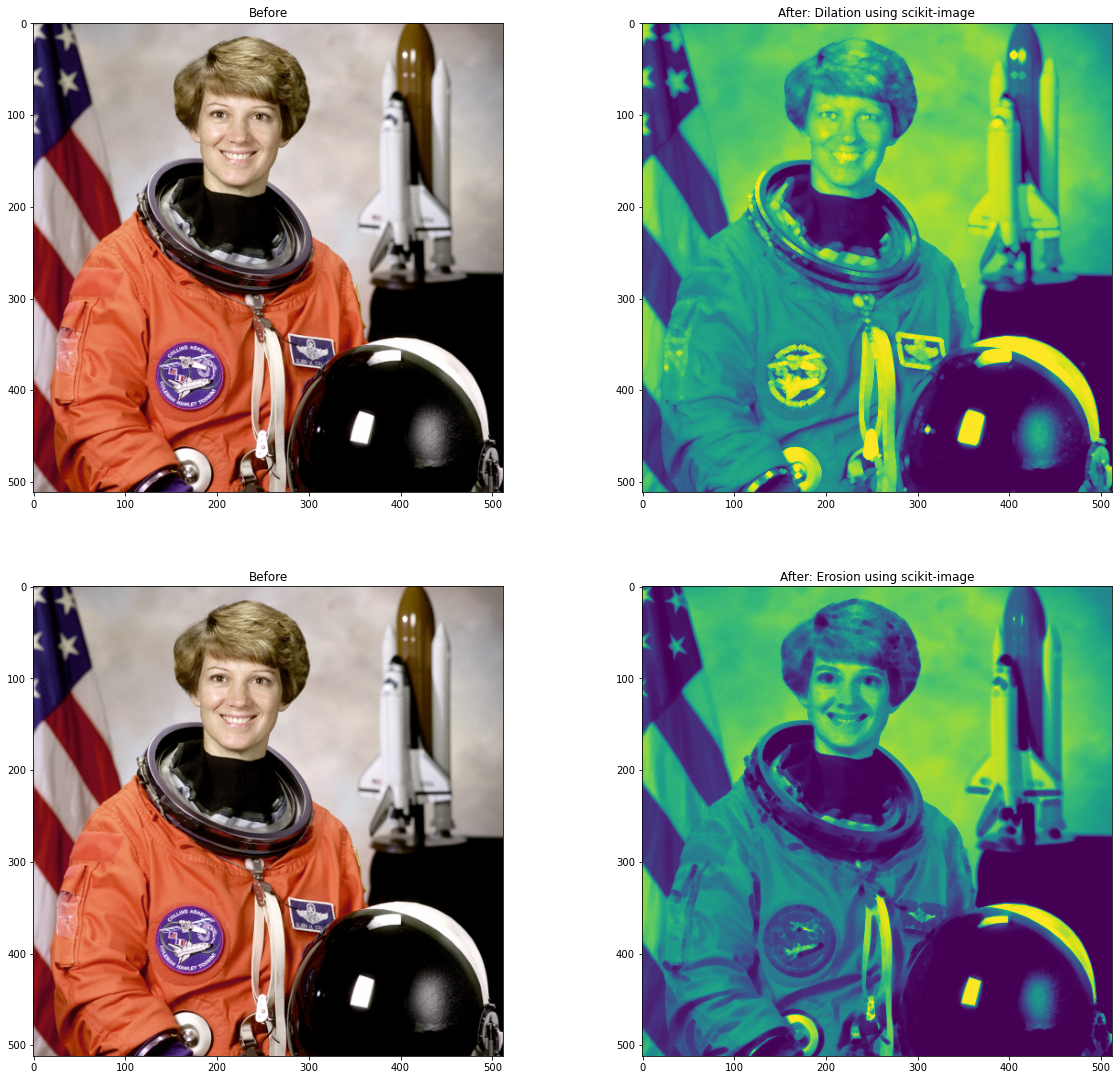

In [5]:
fig4 = plt.figure(figsize=(20, 19))

fig4.add_subplot(2, 2, 1)
plt.title('Before')
plt.imshow(img_ski)

img_ski_gray = color.rgb2gray(img_ski)

# using scikit-image
dilated_ski = dilation(img_ski_gray, disk(2))
fig4.add_subplot(2, 2, 2)
plt.title('After: Dilation using scikit-image')
plt.imshow(dilated_ski)

fig4.add_subplot(2, 2, 3)
plt.title('Before')
plt.imshow(img_ski)

eroded_ski = erosion(img_ski_gray, disk(2))
fig4.add_subplot(2, 2, 4)
plt.title('After: Erosion using scikit-image')
plt.imshow(eroded_ski)

## 4. Custom Filters

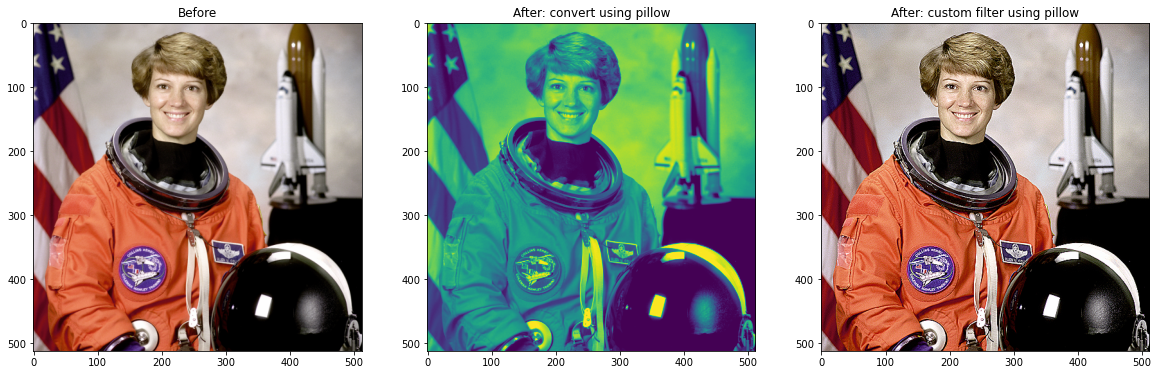

In [19]:
fig5 = plt.figure(figsize=(20, 19))

fig5.add_subplot(2, 3, 1)
plt.title('Before')
plt.imshow(img_pil)

# convert to "L"
img_pil_L = img_pil.convert('L')
fig5.add_subplot(2, 3, 2)
plt.title('After: convert using pillow')
plt.imshow(img_pil_L)

# using pillow
pil_cus1 = img_pil.filter(ImageFilter.Kernel((3, 3), [0, -1, 0, 
                                                      -1, 5, -1, 
                                                      0, -1, 0]))
fig5.add_subplot(2, 3, 3)
plt.title('After: custom filter using pillow')
plt.imshow(pil_cus1)

## 5. Image Thresholding

In [12]:
img_ski.shape

(512, 512, 3)

In [10]:
superpixels = segmentation.watershed(img_ski)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


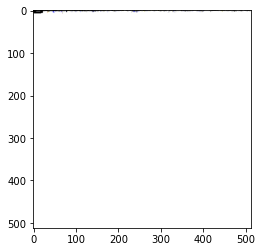

In [8]:
plt.imshow(superpixels)